In [1]:
import pylabnet.hardware.ni_daqs.nidaqmx_card as nidaqmx
import pylabnet.hardware.staticline.staticline as staticline
import pylabnet.network.client_server.nidaqmx_card as nidaqmx_card_server
import pylabnet.network.client_server.staticline as staticline_server



%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import csv
import datetime

In [2]:
daq_client = nidaqmx_card_server.Client(
    host='192.168.50.104', 
    port=33813
)

In [3]:
datetime.datetime.now().strftime()

TypeError: strftime() missing required argument 'format' (pos 1)

In [3]:
# Connect Client
daq_client.connect()

0

In [12]:
daq_client.get_ai_voltage('ai3', 1, 1)

[1.4782799837721394]

In [18]:
with open('daq_log_power_with_lock_parts_post_polarization_2.csv', mode='w+', newline='') as log_file:
    print("Initialized")
for i in range(60*60*12):
    print(i)
    with open('daq_log_power_with_lock_parts_post_polarization_2.csv', mode='a', newline='') as log_file:
        csv_writer = csv.writer(log_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        curr_time = datetime.datetime.now()
        volts_blue = daq_client.get_ai_voltage('ai3', 100, 1)
        volts_pink = daq_client.get_ai_voltage('ai4', 100, 1)
        volts_yellow = daq_client.get_ai_voltage('ai6', 100, 1)
        volts_output = daq_client.get_ai_voltage('ai7', 100, 1)
        volts_lock1 = daq_client.get_ai_voltage('ai0', 100, 1)
        volts_lock2 = daq_client.get_ai_voltage('ai1', 100, 1) 
        print(np.mean(volts_blue), np.mean(volts_pink), np.mean(volts_yellow), np.mean(volts_output))
        csv_writer.writerow([curr_time, np.mean(volts_blue), np.mean(volts_pink), np.mean(volts_yellow), np.mean(volts_output), np.mean(volts_lock1), np.mean(volts_lock2)])
    time.sleep(1)
    
    



42865992294
7512
1.7811279462430678 0.026885898083345693 0.022072491824399427 4.971504181323656
7513
1.7774369539462864 0.0261354640527663 0.022289892240960188 5.001250410851774
7514
1.744369401944781 0.026827924638971185 0.021363927503604746 5.078325587889009
7515
1.7647648696285492 0.022919548261197423 0.022481526681896208 5.032929168266164
7516
1.7501587192386003 0.027831187302294697 0.02170210592966187 4.976858856037145
7517
1.7765625172737602 0.029303068641855362 0.021610314642108507 4.86318362419759
7518
1.7597952355083941 0.024529921717178077 0.021275356963429748 4.926951692440459
7519
1.729998368514023 0.031035830481623124 0.02180194908333701 4.98086238150611
7520
1.747644915510399 0.024525090596663128 0.02173914451903011 4.940811032367244
7521
1.731637735557728 0.03043194043513004 0.021871195142171337 4.867713752853783
7522
1.7387636681596492 0.020239886831425462 0.02262807066624847 4.9606209068733085
7523
1.7431004222569932 0.02738672422833862 0.021727871904379702 5.012222265

KeyboardInterrupt: 

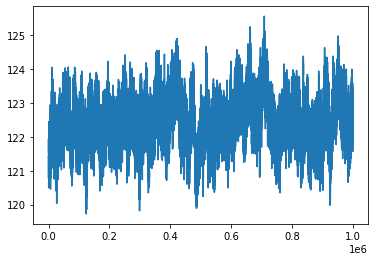

In [24]:
volts = np.array(daq_client.get_ai_voltage('ai4', 1000000, 1))

volt_max = 1.14
volt_min = -26E-3
volt_avg = (volt_max + volt_min)/2
phase = np.arccos((volts - volt_avg)/((volt_max-volt_min)/2))/np.pi*180

plt.plot(phase)